## Analysis of Travel Insurance Data

### Business Problem
***
When we are saying that our stakeholder is an insurance underwriter, we are helping him/her predict whether a new buyer will make the claim or not. 
- This will eventually help the underwriter determine the premium for the buyer and the extent of coverage for the buyer or
- It will help the underwriter devise new Travel Insurance Products that would mitigate losses for the insurance company

<b> What is Travel Insurance and how does it work? </b>

- The main categories of travel insurance include 
    - Trip cancellation or interruption coverage 
    - Baggage and personal effects coverage 
    - Medical coverage 
    - Accidental death or flight accident coverage

### Who are the Stakeholders? Who will benefit from the findings?
***
- <b> Risk Underwriter - Chosen this to be our Stakeholder </b>
- Head of Claims Department
- Head of Finance Department
- Head of Legal Department
- Head of Marketing Department

<b> What does an Insurance Underwriter do? </b>
- An insurance underwriter reviews and evaluates:
    - The level of risk you pose
    - Your premiums
    - The extent of coverage for which you are eligible
    
- With the help of computer programs, underwriters determine the risk involved in insuring a particular person or company and calculate the appropriate premiums for the amount of coverage requested
- If an underwriter is too conservative, an insurance company may lose business. If they are too generous, the company may need to pay excessive claims.

<b> What does the Claims Department do? </b>
- They study the claim and decide whether to accept or reject the claim
- They decide the claim amount on case-to-case basis (also depends on the policy opted for by the insured)
- They are in charge of Claims Reserve (indirectly they are responsible for company's profits)

### Data Science Problem
***
- Predict if a new buyer will make the claim or not basis the given data

### Business Metric
***

### Data Science Metric
***

In [1]:
# Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Suppress Warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load Datasets
train = pd.read_csv('../Data/train.csv')
test = pd.read_csv('../Data/test.csv')

## Data Preparation & Exploration

In [4]:
# Display random 5 rows
train.sample(n=5)

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
11814,8422,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,16,UNITED KINGDOM,89.100000,53.460000,39,0
35260,7586,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,72,"KOREA, REPUBLIC OF",39.600000,23.760000,35,0
31487,5210,EPX,Travel Agency,Online,Cancellation Plan,43,THAILAND,25.000000,0.000000,37,0
21237,7039,EPX,Travel Agency,Online,1 way Comprehensive Plan,11,THAILAND,20.000000,0.000000,23,0
32619,2757,JZI,Airlines,Online,Basic Plan,5,CHINA,20.891358,7.311975,60,1


In [5]:
# Shape
train.shape

(52310, 11)

In [6]:
# Info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52310 entries, 0 to 52309
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    52310 non-null  int64  
 1   Agency                52310 non-null  object 
 2   Agency Type           52310 non-null  object 
 3   Distribution Channel  52310 non-null  object 
 4   Product Name          52310 non-null  object 
 5   Duration              52310 non-null  int64  
 6   Destination           52310 non-null  object 
 7   Net Sales             52310 non-null  float64
 8   Commision (in value)  52310 non-null  float64
 9   Age                   52310 non-null  int64  
 10  Claim                 52310 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 4.4+ MB


In [7]:
# Describe
train.describe()

,ID,Duration,Net Sales,Commision (in value),Age,Claim
count,52310.000000,52310.000000,52310.000000,52310.000000,52310.000000,52310.000000
mean,6005.745804,58.256108,48.554673,12.219963,39.555725,0.166699
std,2306.450475,109.138708,60.198589,22.847645,13.762473,0.372710
min,2000.000000,-2.000000,-389.000000,0.000000,0.000000,0.000000
25%,4015.000000,10.000000,19.800000,0.000000,33.000000,0.000000
50%,6002.000000,24.000000,29.500000,0.000000,36.000000,0.000000
75%,8004.000000,57.000000,55.000000,13.380000,43.000000,0.000000
max,10000.000000,4881.000000,682.000000,262.760000,118.000000,1.000000


### Observations from Initial Data Exploration
- There are **no NULL values** in the dataset
- Duration and Net Sales are **Right Skewed**

### Assumptions
- 1: Claimed, 0: Not Claimed

In [40]:
a = train.copy()
a.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.0,0.00,41,0
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.0,0.00,35,0
2,9251,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.8,11.88,47,0
3,4754,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.0,0.00,48,0
4,8840,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.0,0.00,36,0


In [59]:
# df['X'] = np.where(df['Y']>=50, 'yes', 'no')
a['Duration'] = np.where((a['Age'] >= 1) & (a['Age'] <= 60), 540, a['Duration'])
a['Duration'].value_counts()

540    49336
5         97
6         95
9         94
10        93
       ...  
269        1
218        1
397        1
238        1
255        1
Name: Duration, Length: 249, dtype: int64

### Univariate Analysis of Data

#### How many claims were made?

In [8]:
train['Claim'].value_counts()

0    43590
1     8720
Name: Claim, dtype: int64

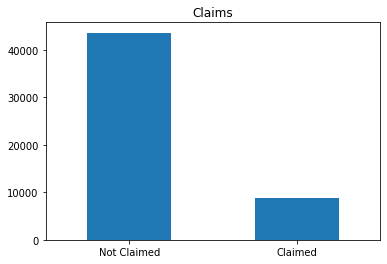

In [9]:
train['Claim'].value_counts().plot(kind='bar')
plt.xticks((0, 1), ('Not Claimed', 'Claimed'), rotation='horizontal')
plt.title('Claims')
plt.show()

##### Insight
- The number of customers who have not made any claim is almost 4 times the number of customers who have made the claim

#### *Age* distribution of SafeTravel, Inc. customers

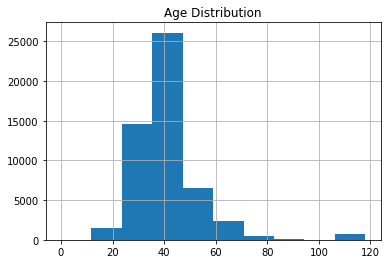

In [10]:
train['Age'].hist()
plt.title('Age Distribution')
plt.show()

##### How many customers are above 100 years of age?

In [11]:
train[train['Age'] > 100].shape[0]

737

##### Profile of customers above 100 years of age

In [12]:
train[train['Age'] > 100]['Product Name'].value_counts()

Value Plan                         599
Basic Plan                          33
2 way Comprehensive Plan            32
Comprehensive Plan                  32
1 way Comprehensive Plan            22
Ticket Protector                    11
Premier Plan                         3
Cancellation Plan                    3
Rental Vehicle Excess Insurance      1
24 Protect                           1
Name: Product Name, dtype: int64

In [13]:
train[train['Age'] > 100]['Destination'].value_counts().head(10)

INDIA                        546
MALAYSIA                      37
CHINA                         34
THAILAND                      26
AUSTRALIA                     16
SINGAPORE                     16
INDONESIA                     13
HONG KONG                     11
PHILIPPINES                    7
TAIWAN, PROVINCE OF CHINA      5
Name: Destination, dtype: int64

In [14]:
train[train['Age'] > 100]['Agency'].value_counts()

JWT    545
EPX     57
ART     43
JZI     42
CCR     33
SSI     11
C2B      4
CWT      1
ADM      1
Name: Agency, dtype: int64

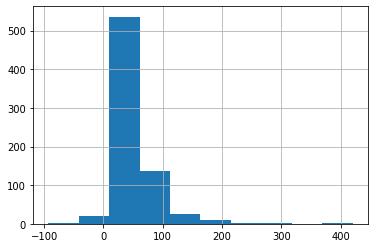

In [15]:
train[train['Age'] > 100]['Net Sales'].hist()

In [16]:
# Check if there are duplicate instances
train[train['Age'] == 118]

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
46,9156,JWT,Airlines,Online,Value Plan,49,INDIA,31.0,12.40,118,0
88,2814,JWT,Airlines,Online,Value Plan,22,INDIA,50.0,20.00,118,0
109,4207,JWT,Airlines,Online,Value Plan,46,INDIA,31.0,12.40,118,0
132,7086,JWT,Airlines,Online,Value Plan,89,INDIA,117.0,46.80,118,0
156,2890,JWT,Airlines,Online,Value Plan,68,INDIA,180.0,72.00,118,0
...,...,...,...,...,...,...,...,...,...,...,...
52049,9704,JWT,Airlines,Online,Value Plan,3,INDIA,31.0,12.40,118,0
52078,8849,JWT,Airlines,Online,Value Plan,4,INDIA,31.0,12.40,118,0
52208,2829,JWT,Airlines,Online,Value Plan,9,INDIA,31.0,12.40,118,0
52213,8297,JZI,Airlines,Online,Value Plan,70,UNITED STATES,0.0,25.55,118,0


##### Observation
- We need to treat the outliers, that is the customers above the age of 100, as they all seem to be duplicate entries given their profiles
- We need to look at Net Sales as there are negative entries

#### *Net Sales* distribution of SafeTravel, Inc. customers?

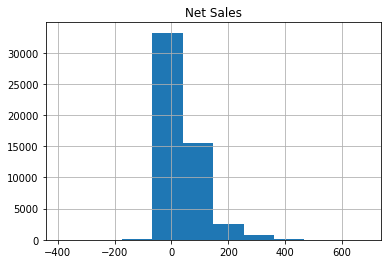

In [17]:
train['Net Sales'].hist()
plt.title('Net Sales')
plt.show()

##### How many customers have net sales <0?

In [18]:
train[train['Net Sales'] < 0].shape[0]

503

##### Have the customers with net sales <0 made any claim?

In [19]:
train[train['Net Sales'] < 0]['Claim'].value_counts()

0    487
1     16
Name: Claim, dtype: int64

##### Insight:
- We wanted to check if in the Net Sales column, the sales was adjusted against the claim amount (to explain the negative vaalues). However, we have 487 instances where they had made no claim.
- We are making an assumption that instances where Net Sales <0 are error in data entry and will remove all of them to better analyze the data

#### *Commision* distribution

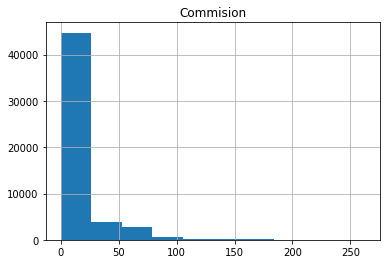

In [20]:
train['Commision (in value)'].hist()
plt.title('Commision')
plt.show()

#### Distribution of *Duration of Stay*

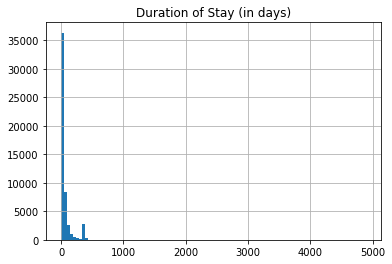

In [21]:
train['Duration'].hist(bins=100)
plt.title('Duration of Stay (in days)')
plt.show()

##### How many custmers do we have whose duration of stay is more than 365 days (1 year)?

In [22]:
train[train['Duration'] > 365].shape[0]

1966

##### How many custmers do we have whose duration of stay is more than 730 days (2 years)?

In [23]:
train[train['Duration'] > 730].shape[0]

10

In [24]:
np.min(train['Duration'])

-2

#### How many such instances do we have with outliers?

In [25]:
train[(train['Age'] > 100) | (train['Net Sales'] < 0)
      | (train['Duration'] > 730)]

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
46,9156,JWT,Airlines,Online,Value Plan,49,INDIA,31.0,12.40,118,0
88,2814,JWT,Airlines,Online,Value Plan,22,INDIA,50.0,20.00,118,0
104,9734,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,81,UNITED KINGDOM,-128.7,77.22,63,0
109,4207,JWT,Airlines,Online,Value Plan,46,INDIA,31.0,12.40,118,0
132,7086,JWT,Airlines,Online,Value Plan,89,INDIA,117.0,46.80,118,0
...,...,...,...,...,...,...,...,...,...,...,...
52163,3711,EPX,Travel Agency,Online,Cancellation Plan,18,JAPAN,-45.0,0.00,54,0
52208,2829,JWT,Airlines,Online,Value Plan,9,INDIA,31.0,12.40,118,0
52213,8297,JZI,Airlines,Online,Value Plan,70,UNITED STATES,0.0,25.55,118,0
52242,4079,EPX,Travel Agency,Online,Cancellation Plan,261,UNITED STATES,-80.0,0.00,71,0


In [26]:
train[(train['Age'] > 100) | (train['Net Sales'] < 0) |
      (train['Duration'] > 730)]['Claim'].value_counts()

0    1156
1      85
Name: Claim, dtype: int64

##### Observation:
There are 1241  instances of outliers in train dataset

#### One more hygiene check - How many instances do we have where net sales value is less than commission?

In [27]:
train[train['Net Sales'] <= train['Commision (in value)']].shape[0]

1843

In [28]:
train[(train['Age'] > 100) | (train['Net Sales'] < 0) | (train['Duration']
                                                         > 730) | (train['Net Sales'] <= train['Commision (in value)'])].shape[0]

2568

##### Observation
Along with 1241 instances of outliers in dataset, we have 1843 instances where 'net sales<=commission'

#### Check how many such instances of outliers exist in Test data

In [29]:
test.shape

(22421, 10)

In [30]:
test[(test['Age'] > 100) | (test['Net Sales'] < 0) | (test['Duration'] > 730)]

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age
124,17600,JWT,Airlines,Online,Value Plan,25,INDIA,39.0,15.60,118
133,11102,JWT,Airlines,Online,Value Plan,9,INDIA,31.0,12.40,118
164,11991,JWT,Airlines,Online,Value Plan,2,INDIA,31.0,12.40,118
180,15650,CCR,Travel Agency,Offline,Comprehensive Plan,71,THAILAND,29.0,9.57,118
208,15326,CWT,Travel Agency,Offline,Rental Vehicle Excess Insurance,28,SWITZERLAND,99.0,59.40,118
...,...,...,...,...,...,...,...,...,...,...
22216,17801,CCR,Travel Agency,Offline,Comprehensive Plan,8,THAILAND,29.0,9.57,118
22325,18329,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,6,MALAYSIA,-39.6,23.76,35
22346,18917,JWT,Airlines,Online,Value Plan,5,INDIA,31.0,12.40,118
22355,16523,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,136,FRANCE,-99.0,59.40,26


#### Quick Way to Plot Histograms for Numerical Columns

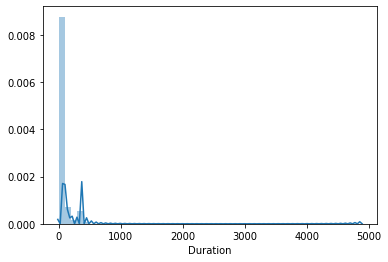

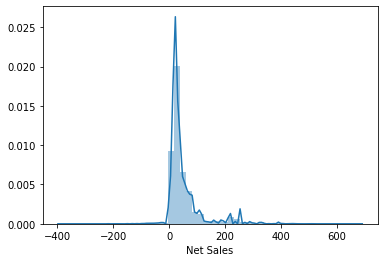

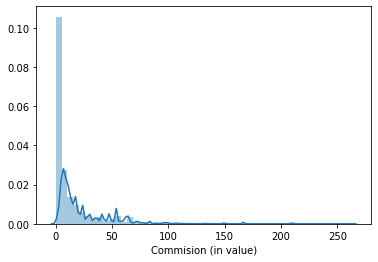

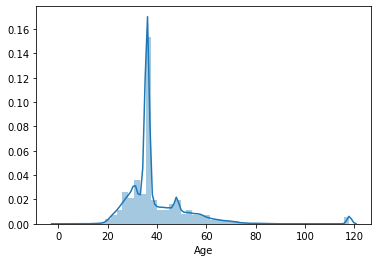

In [31]:
train_numerical = train.select_dtypes(include='number')
train_numerical.drop(['ID', 'Claim'], axis=1, inplace=True)
for i, col in enumerate(train_numerical.columns):
    plt.figure(i)
    sns.distplot(train_numerical[col])

### Multi-variate Analysis of Data

#### Check for categorical columns in the dataset

In [32]:
train.select_dtypes(include='object').columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Destination'],
      dtype='object')

#### Which Products had highest claims?

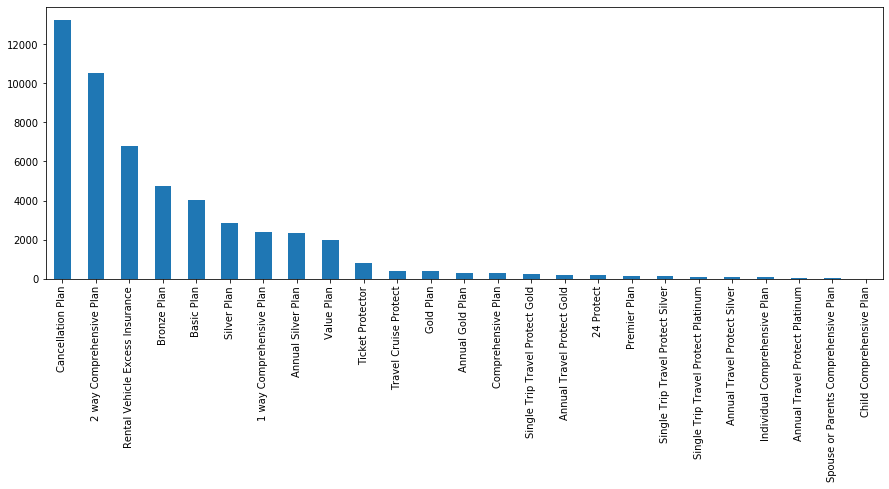

In [33]:
# Product Count
train['Product Name'].value_counts().plot(kind='bar', figsize=(15, 5))

In [34]:
product_claim_table = train.groupby(['Product Name', 'Claim'])[
    'Claim'].count().unstack()
product_claim_table.head()

Claim,0,1
Product Name,,
1 way Comprehensive Plan,2341.0,68.0
2 way Comprehensive Plan,9098.0,1457.0
24 Protect,165.0,NaN
Annual Gold Plan,123.0,172.0
Annual Silver Plan,897.0,1451.0


In [35]:
product_claim_table['Total'] = product_claim_table[0]+product_claim_table[1]
product_claim_table[0] = round(
    (product_claim_table[0]/product_claim_table['Total'])*100, 2)
product_claim_table[1] = round(
    (product_claim_table[1]/product_claim_table['Total'])*100, 2)
product_claim_table.sort_values([1, 0], ascending=False, inplace=True)

In [36]:
product_claim_table

Claim,0,1,Total
Product Name,,,
Annual Travel Protect Gold,34.43,65.57,183.0
Annual Silver Plan,38.20,61.80,2348.0
Annual Gold Plan,41.69,58.31,295.0
Single Trip Travel Protect Platinum,50.00,50.00,100.0
Silver Plan,51.64,48.36,2862.0
Single Trip Travel Protect Gold,51.79,48.21,251.0
Individual Comprehensive Plan,55.95,44.05,84.0
Bronze Plan,57.23,42.77,4723.0
Gold Plan,62.37,37.63,380.0


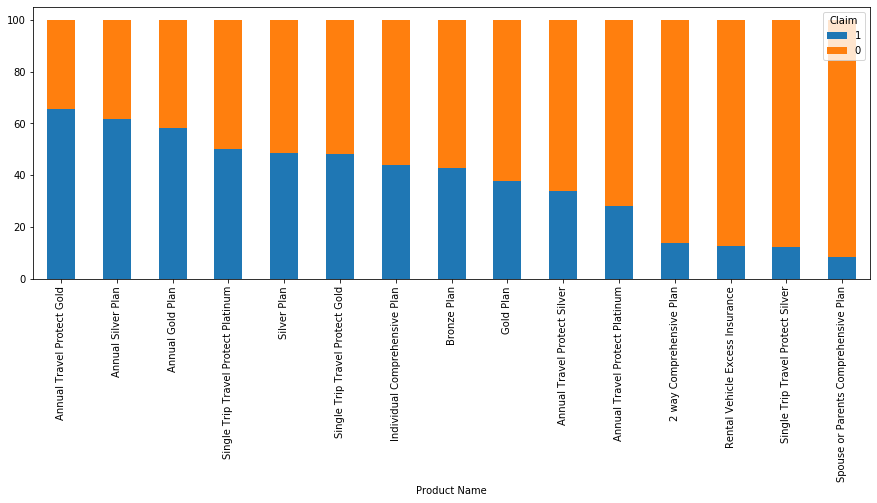

In [37]:
# Plotting the above table
product_claim_table[[1, 0]].head(15).plot(
    kind='bar', stacked=True, figsize=(15, 5))
plt.show()

##### Insight
- The top 3 most bought plans are - Cancellation Plan, 2 Way Comprehensive Plan, Rental Vehicle Excess Insurance
    - The above plans have claims in the range of 3-14%
- Annual Travel Protect Gold, Annual Silver Plan and Annual Gold Plan have less buyers and highest claims
    - The above plans have claims in the range of 58-66%

#### What is the *Average Net Sales* received for each product?

In [38]:
product_sales_table = train.groupby(['Product Name'])[
    'Net Sales'].mean().sort_values(ascending=False)
product_sales_table

Product Name
Annual Gold Plan                        356.650083
Annual Travel Protect Platinum          330.869159
Annual Travel Protect Gold              258.711839
Annual Silver Plan                      225.598643
Annual Travel Protect Silver            197.343618
Individual Comprehensive Plan            98.819497
Spouse or Parents Comprehensive Plan     86.000000
Gold Plan                                75.505900
Child Comprehensive Plan                 74.000000
Premier Plan                             63.340426
Silver Plan                              59.400097
Value Plan                               47.526106
Single Trip Travel Protect Platinum      46.591398
Rental Vehicle Excess Insurance          46.103047
2 way Comprehensive Plan                 43.871924
Single Trip Travel Protect Gold          37.944770
Bronze Plan                              35.181802
Single Trip Travel Protect Silver        34.368907
Travel Cruise Protect                    29.270888
Comprehensive Plan

In [39]:
product_sales_table.loc[['Annual Gold Plan', 'Annual Travel Protect Gold', 'Annual Silver Plan',
                         'Cancellation Plan', '2 way Comprehensive Plan', 'Rental Vehicle Excess Insurance']].sort_values(ascending=False)

Product Name
Annual Gold Plan                   356.650083
Annual Travel Protect Gold         258.711839
Annual Silver Plan                 225.598643
Rental Vehicle Excess Insurance     46.103047
2 way Comprehensive Plan            43.871924
Cancellation Plan                   26.303287
Name: Net Sales, dtype: float64

##### Observation
- We see that the premium for "less bought, high claimed" products is higher compared to "most bought, less claimed" products

#### is agency with particular product claims more?

In [40]:
train.groupby(['Agency Type','Agency','Product Name','Claim'])['Claim'].count().sort_values(ascending = False).unstack()

Claim                                                            0       1
Agency Type   Agency Product Name                                         
Airlines      ART    24 Protect                              165.0     NaN
                     Value Plan                               58.0     NaN
              C2B    Annual Gold Plan                        123.0   172.0
                     Annual Silver Plan                      897.0  1451.0
                     Bronze Plan                            2703.0  2020.0
                     Gold Plan                               237.0   143.0
                     Silver Plan                            1478.0  1384.0
                     Value Plan                                NaN     7.0
              JWT    Value Plan                              519.0    31.0
              JZI    Basic Plan                             3796.0   246.0
                     Premier Plan                              4.0     NaN
                     Value Plan                              563.0    10.0
              RAB    Value Plan                              526.0     1.0
              SSI    Ticket Protector                        723.0    57.0
Travel Agency ADM    Premier Plan                             30.0     NaN
                     Value Plan                               26.0     NaN
              CBH    Comprehensive Plan                       74.0     1.0
                     Premier Plan                              1.0     NaN
              CCR    Comprehensive Plan                      135.0    10.0
                     Premier Plan                             11.0     NaN
              CSR    Comprehensive Plan                       57.0     1.0
                     Premier Plan                              2.0     NaN
              CWT    Rental Vehicle Excess Insurance        5965.0   848.0
              EPX    1 way Comprehensive Plan               2341.0    68.0
                     2 way Comprehensive Plan               9098.0  1457.0
                     Cancellation Plan                     12899.0   355.0
              KML    Premier Plan                             91.0     2.0
                     Value Plan                              175.0    45.0
              LWC    Annual Travel Protect Gold               63.0   120.0
                     Annual Travel Protect Platinum           36.0    14.0
                     Annual Travel Protect Silver             61.0    31.0
                     Single Trip Travel Protect Gold         130.0   121.0
                     Single Trip Travel Protect Platinum      50.0    50.0
                     Single Trip Travel Protect Silver       114.0    16.0
              TST    Travel Cruise Protect                   373.0    21.0
              TTW    Child Comprehensive Plan                  8.0     NaN
                     Individual Comprehensive Plan            47.0    37.0
                     Spouse or Parents Comprehensive Plan     11.0     1.0

In [68]:
#Find Claim vs Not claim % for top 5 products, top 4 agencies, top 5 destinations
import seaborn as sns
top_5  = train['Product Name'].value_counts()[:5]
top_5
# fg=sns.FacetGrid(top_5,col="Product Name",height=3,aspect=1.5)
# fg=fg.map(plt.hist,"Claim")

Cancellation Plan                  13254
2 way Comprehensive Plan           10555
Rental Vehicle Excess Insurance     6813
Bronze Plan                         4723
Basic Plan                          4042
Name: Product Name, dtype: int64

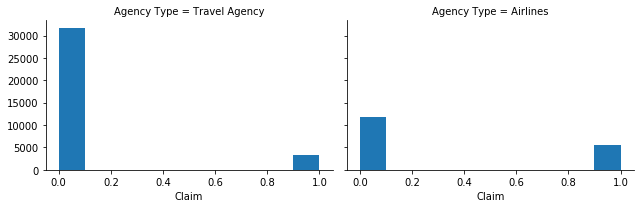

In [63]:
fg =sns.FacetGrid(train,col='Agency Type',height=3,aspect=1.5)
fg = fg.map(plt.hist,"Claim")

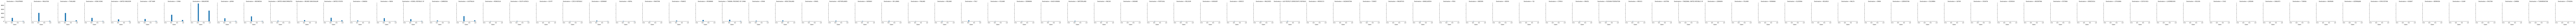

In [70]:
fg =sns.FacetGrid(train,col='Destination',height=3)
fg = fg.map(plt.hist,"Claim")

In [88]:
top10_products = train[train['Claim']==1]['Product Name'].value_counts().head(10).index
# bottom10_products = train[train['Claim']==1]['Product Name'].value_counts().head(10).index
top10_products

test = train[train["Product Name"].isin(top10_products)]
test

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.000000,0.0000,41,0
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.000000,0.0000,35,0
2,9251,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.800000,11.8800,47,0
3,4754,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.000000,0.0000,48,0
4,8840,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.000000,0.0000,36,0
...,...,...,...,...,...,...,...,...,...,...,...
52304,5212,EPX,Travel Agency,Online,Cancellation Plan,10,SINGAPORE,10.000000,0.0000,36,0
52305,5370,C2B,Airlines,Online,Annual Gold Plan,365,SINGAPORE,444.750593,111.1858,40,1
52307,7083,C2B,Airlines,Online,Bronze Plan,38,SINGAPORE,61.100000,15.2800,37,0
52308,8523,EPX,Travel Agency,Online,Cancellation Plan,2,THAILAND,10.000000,0.0000,46,0


<b> Building the Model </b>
***

<b> Feature Selection & Engineering </b>
***

<b> Keep Improving your model and keep going back and give your Conclusions </b>
***